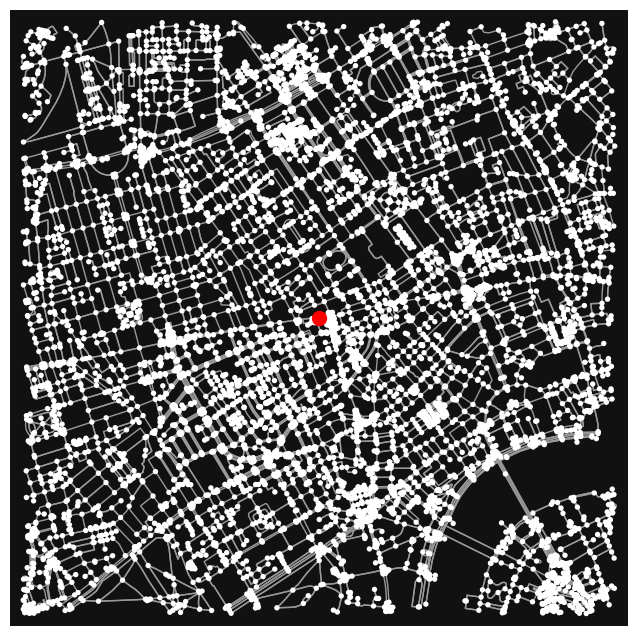

In [2]:
import osmnx as ox
import matplotlib.pyplot as plt
import networkx as nx


centre_point = (51.51635767783695, -0.1311754883273925)


# Download the street network for the specified location
# Using the average of the two latitudes and longitudes to center the graph
G = ox.graph_from_point(centre_point, dist=1500, network_type='all')

# Plot the network with the closest nodes highlighted
fig, ax = ox.plot_graph(G, show=False, close=False)

# Plot the first set of coordinates in red and its closest node in blue
ax.scatter(centre_point[1], centre_point[0], c='red', s=100)

plt.show()

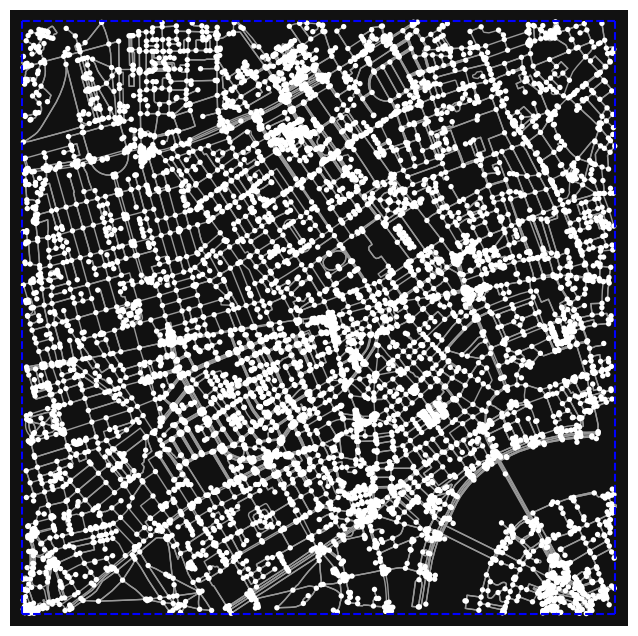

In [3]:
import numpy as np

dist = 1500


# Calculate the approximate change in latitude and longitude for the given distance
delta_lat = dist / 111000  # degrees of latitude per meter
# For longitude, we need to multiply by the cosine of the latitude
delta_lon = dist / (111000 * np.cos(centre_point[0] * np.pi / 180))

# Calculate the bounding box
north = centre_point[0] + delta_lat
south = centre_point[0] - delta_lat
east = centre_point[1] + delta_lon
west = centre_point[1] - delta_lon

# Generate the four corner points of the bounding box
corner_points = [(north, east), (north, west), (south, west), (south, east)]

# Plot the network
fig, ax = ox.plot_graph(G, show=False, close=False)

# Plot the bounding box by connecting the corner points
for i, point in enumerate(corner_points):
    next_point = corner_points[(i + 1) % len(corner_points)]
    x = [point[1], next_point[1]]
    y = [point[0], next_point[0]]
    ax.plot(x, y, 'b--')  # plot with blue dashed line

# Show the plot
plt.show()



# Some Rules

For a waypoint to be a valid incognito waypoint it can't add more than X% time to the journey and the route has to be continuos - which is defined as no U turn (can't revisit the node that you went by)

Random Point 1: Latitude 51.52143082925412, Longitude -0.14389641581748366
Random Point 2: Latitude 51.52603512001378, Longitude -0.1255730043554042


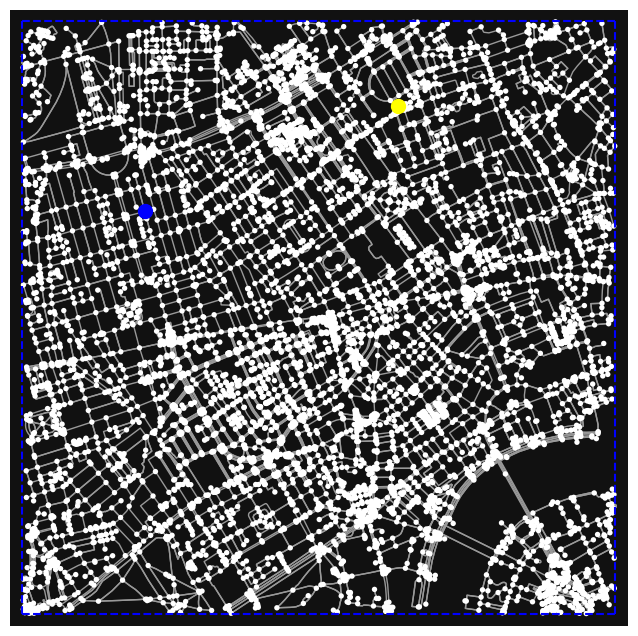

In [4]:
import random

# Function to generate a random point within the bounding box
def generate_random_point_within_bounds(north, south, east, west):
    random_lat = random.uniform(south, north)
    random_lon = random.uniform(west, east)
    return random_lat, random_lon

# Generate two random points
random_point1 = generate_random_point_within_bounds(north, south, east, west)
random_point2 = generate_random_point_within_bounds(north, south, east, west)

# Print the random points
print(f"Random Point 1: Latitude {random_point1[0]}, Longitude {random_point1[1]}")
print(f"Random Point 2: Latitude {random_point2[0]}, Longitude {random_point2[1]}")

# Get the closest nodes

# Find the closest node to the first set of coordinates
closest_node1 = ox.distance.nearest_nodes(G, X=random_point1[1], Y=random_point1[0])
closest_node2 = ox.distance.nearest_nodes(G, X=random_point2[1], Y=random_point2[0])

# Plot the network
fig, ax = ox.plot_graph(G, show=False, close=False)

# Plot the bounding box by connecting the corner points
for i, point in enumerate(corner_points):
    next_point = corner_points[(i + 1) % len(corner_points)]
    x = [point[1], next_point[1]]
    y = [point[0], next_point[0]]
    ax.plot(x, y, 'b--')  # plot with blue dashed line

# Plot the random points
ax.scatter(G.nodes[closest_node1]['x'], G.nodes[closest_node1]['y'], c='blue', s=100)
ax.scatter(G.nodes[closest_node2]['x'], G.nodes[closest_node2]['y'], c='yellow', s=100)
# Show the plot
plt.show()


In [5]:
G

In [6]:
# Convert the graph to a GeoDataFrame
edges = ox.graph_to_gdfs(G, nodes=False, edges=True)

In [7]:
edges

osmid               name       highway  \
u           v           key                                                
78112       25508583    0     129375498       Outer Circle  unclassified   
            25508584    0     129375498       Outer Circle  unclassified   
                        1       4257258  Cambridge Terrace   residential   
99884       296016841   0       4082681                NaN       footway   
            4544836450  0       5090291                NaN       footway   
...                                 ...                ...           ...   
11331240986 11309776215 0    1220523374                NaN       footway   
            4347914536  0    1221776373                NaN       footway   
11331240987 11309776197 0    1220523381                NaN       footway   
            11309776229 0    1220523381                NaN       footway   
            4347914536  0    1221776373                NaN       footway   

                            maxspeed      access  oneway reversed   length  \
u           v           key                                                  
78112       25508583    0     20 mph  permissive   False    False   19.391   
            25508584    0     20 mph  permissive   False     True   63.845   
                        1     20 mph  permissive    True    False  102.544   
99884       296016841   0        NaN         NaN   False    False  467.418   
            4544836450  0        NaN         NaN   False    False  307.311   
...                              ...         ...     ...      ...      ...   
11331240986 11309776215 0        NaN         NaN   False     True    0.612   
            4347914536  0        NaN         NaN   False     True    8.409   
11331240987 11309776197 0        NaN         NaN   False    False   24.179   
            11309776229 0        NaN         NaN   False     True    7.263   
            4347914536  0        NaN         NaN   False    False    7.865   

                                                                      geometry  \
u           v           key                                                      
78112       25508583    0    LINESTRING (-0.14579 51.52698, -0.14578 51.52680)   
            25508584    0    LINESTRING (-0.14579 51.52698, -0.14581 51.52755)   
                        1    LINESTRING (-0.14579 51.52698, -0.14551 51.526...   
99884       296016841   0    LINESTRING (-0.15282 51.52436, -0.15260 51.524...   
            4544836450  0    LINESTRING (-0.15282 51.52436, -0.15237 51.524...   
...                                                                        ...   
11331240986 11309776215 0    LINESTRING (-0.13235 51.50932, -0.13234 51.50932)   
            4347914536  0    LINESTRING (-0.13235 51.50932, -0.13245 51.50929)   
11331240987 11309776197 0    LINESTRING (-0.13255 51.50925, -0.13273 51.50944)   
            11309776229 0    LINESTRING (-0.13255 51.50925, -0.13250 51.50920)   
            4347914536  0    LINESTRING (-0.13255 51.50925, -0.13245 51.50929)   

                            lanes  ref tunnel bridge width junction service  \
u           v           key                                                   
78112       25508583    0     NaN  NaN    NaN    NaN   NaN      NaN     NaN   
            25508584    0     NaN  NaN    NaN    NaN   NaN      NaN     NaN   
                        1     NaN  NaN    NaN    NaN   NaN      NaN     NaN   
99884       296016841   0     NaN  NaN    NaN    NaN   NaN      NaN     NaN   
            4544836450  0     NaN  NaN    NaN    NaN   NaN      NaN     NaN   
...                           ...  ...    ...    ...   ...      ...     ...   
11331240986 11309776215 0     NaN  NaN    NaN    NaN   NaN      NaN     NaN   
            4347914536  0     NaN  NaN    NaN    NaN   NaN      NaN     NaN   
11331240987 11309776197 0     NaN  NaN    NaN    NaN   NaN      NaN     NaN   
            11309776229 0     NaN  NaN    NaN    NaN   NaN      NaN     NaN   
            434

## The plan now

The first thing is to create a new column with the weights of the edges. Now this can be done following Khalid's code. 

This is the reward function - plain "unbiased" 

Then I colour code the map with the weights 

The I select some businesses around bush house and increase the reward function there by a variable gamma

Then I run routes on the biased and unbiased graphs

I find the routes that are different (same source and target)

then I start the IRL work on trying to create the heatmap of the rewards from biased and unbiased maps. 



In [8]:
from pprint import pprint

In [9]:
def calculateWeight(data):
    try:
        if data.get('maxspeed'):
            if isinstance(data['maxspeed'], list):
                data['maxspeed'] = data['maxspeed'][0]
            speed = float(data['maxspeed'].split(' ')[0])
        else:
            speed = 0
    except:
        print(data['maxspeed'])

    weight =  data['length']/speed
    return weight

In [10]:
for (i, j, data) in G.edges(data=True):
    G[i][j][0]['weight'] = calculateWeight(data)

/var/folders/p3/_7x95kts1j3536nntzbxcf_00000gn/T/ipykernel_81466/3162975884.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  weight =  data['length']/speed


In [11]:
path_weight = nx.shortest_path(G, source=closest_node1, target=closest_node2, weight='weight')
path_length = nx.shortest_path(G, source=closest_node1, target=closest_node2, weight='length')


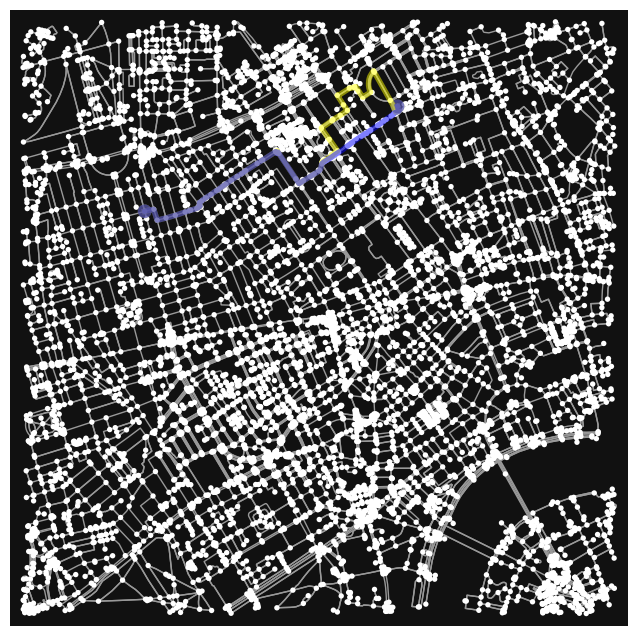

In [12]:

fig, ax = ox.plot_graph_routes(G, routes=[path_weight, path_length], route_colors=['yellow','blue'], route_linewidth=4, show=False, close=False)


Next steps:

generate a bunch (function of X) number of edges of interest

modulate the reward function 

In [13]:

# Get edges and their lengths
edges = ox.graph_to_gdfs(G, nodes=False, edges=True)

In [22]:
import numpy as np

# Replace all inf values with a large number
large_number = 1e3
edges.loc[edges['weight'] == np.inf, 'weight'] = large_number


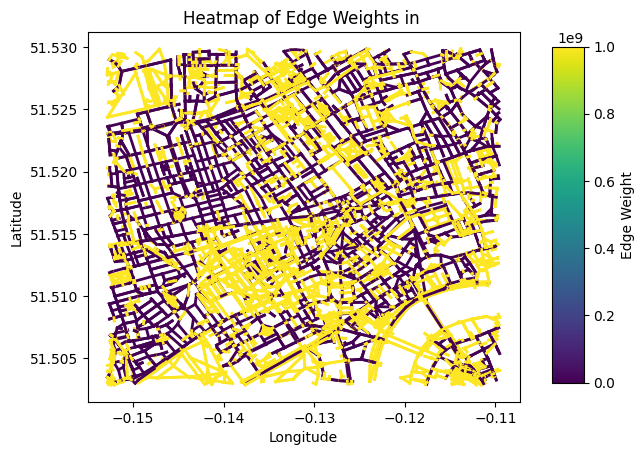

In [23]:
import matplotlib.pyplot as plt

# ... [your previous code to prepare the data] ...

# Create a figure and axes
fig, ax = plt.subplots()

# Normalize the weights for color mapping
norm = plt.Normalize(edges['weight'].min(), edges['weight'].max())

# Create a colormap
cmap = plt.cm.viridis

# Plot the edges on the axes
for _, edge in edges.iterrows():
    start_pt = edge['geometry'].coords[0]
    end_pt = edge['geometry'].coords[-1]
    ax.plot([start_pt[0], end_pt[0]], [start_pt[1], end_pt[1]], 
            color=cmap(norm(edge['weight'])), linewidth=2)

# Create an axes for the colorbar
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])

# Create the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, cax=cbar_ax, label='Edge Weight')

# Set the title and labels
ax.set_title('Heatmap of Edge Weights in ')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Adjust layout to make room for the colorbar
plt.subplots_adjust(right=0.8)

# Show the plot
plt.show()


Due to the normalisation it only shows which routes are not possible (because the weights are infinite - or a large number). 
To show the difference in weights I will remove the edges that are not viable

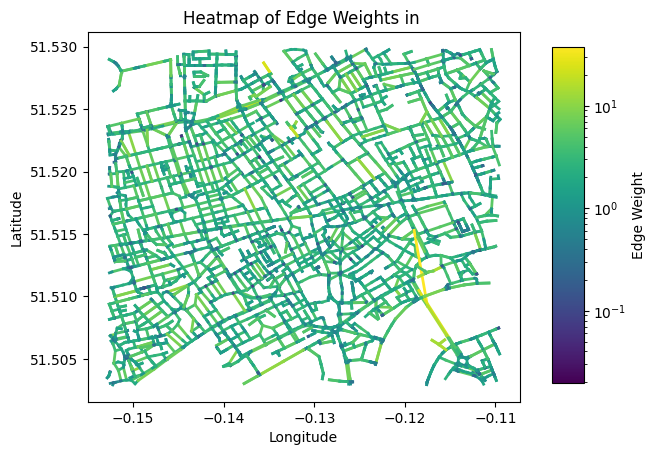

In [25]:
import matplotlib.colors as colors

# Filter the edges dataframe to remove edges with high weight
max_weight = 1000  # set the maximum weight threshold
filtered_edges = edges[edges['weight'] < max_weight]

# Create a figure and axes
fig, ax = plt.subplots()


# Create a logarithmic normalization
norm = colors.LogNorm(vmin=filtered_edges['weight'].min(), vmax=filtered_edges['weight'].max())


# Create a colormap
cmap = plt.cm.viridis

# Plot the edges on the axes
for _, edge in filtered_edges.iterrows():
    start_pt = edge['geometry'].coords[0]
    end_pt = edge['geometry'].coords[-1]
    ax.plot([start_pt[0], end_pt[0]], [start_pt[1], end_pt[1]], 
            color=cmap(norm(edge['weight'])), linewidth=2)

# Create an axes for the colorbar
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])

# Create the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, cax=cbar_ax, label='Edge Weight')

# Set the title and labels
ax.set_title('Heatmap of Edge Weights in ')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Adjust layout to make room for the colorbar
plt.subplots_adjust(right=0.8)

# Show the plot
plt.show()
